<a href="https://colab.research.google.com/github/AnvayRaj/MLP-Notes/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification functions in scikit-learn

* In this week, we will study sklearn functionality for implementing classification algorithms.
* We will cover sklearn APIs for
  * Specific classification algorithms for least square classification, perceptron and logistic regression classifier.
    * with regularization
    * multiclass, multi-label and multi-output setting.
  * Various classifcation metrics.

* Cross-validation and hyper parameter search for classification works exactly like how it works in regression setting.
  * However there are couple of CV strategies that are specific to classification.

## Part 1: Sklearn API for classification

There are broadly two types of APIs based on their functionality:

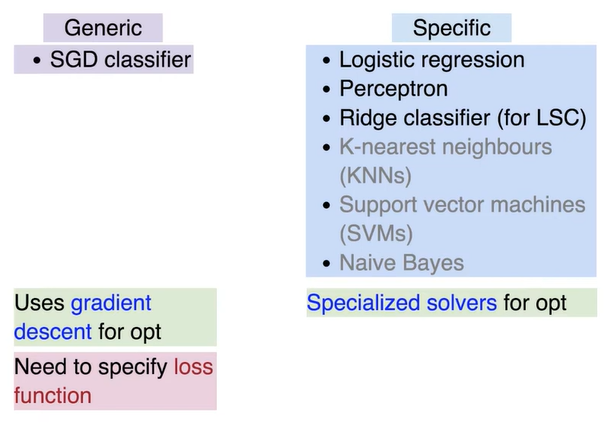

All sklearn estimators for classification implement a few common methods for model training, prediction and evaluation.

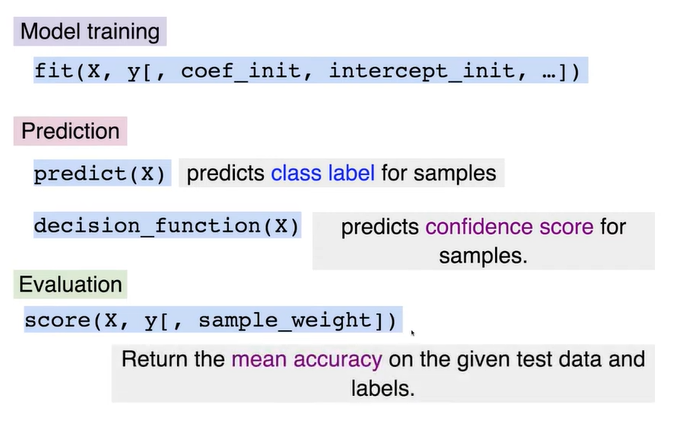

There are few common miscellaneous methods as follows:

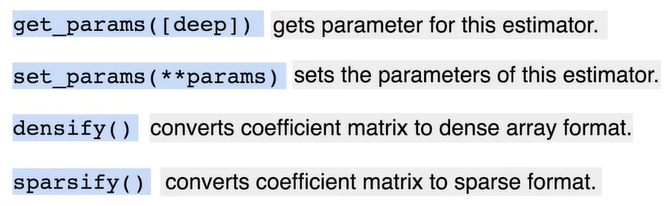

Now let's study how to implement different classifiers with sklearn APIs.

Let's start with implementation of **Least Square Classification(LSC)** with `RidgeClassifier` API.

### Ridge classifier

* RidgeClassifier is a classifier variant of the Ridge regressor.

**Binary Classification**:
* classifier first converts binary targets to {-1,1} and then treats the problem as a regression task, optimizing the objective of regressor:
  * minimize a penalized residual sum of squares
    * min <sub>w</sub> ( || Xw - y ||<sub>2</sub><sup>2</sup> + &alpha; || w ||<sub>2</sub><sup>2</sup> )
      * sklearn provides different solvers for this optimization
      * sklearn uses &alpha; ti denote regularization rate
    * Predicted class corresponds to the sign of the regressor's prdiction


**Multi-class Classification:**
* Treated as multi-output regression
* Predicted class corresponds to the output with the highest value.

#### How to train a least square classifier?

Step 1: Instantiate a classification estimator without passing any arguments to it. This creates a ridge classification object.

In [1]:
from sklearn.linear_model import RidgeClassifier

ridge_classifier = RidgeClassifier()

Step 2: Call fit method on ridge classifier object with training feature matrix and label vector as arguments.

**Note:** The model is fitted using X_train and y_train.

In [6]:
# Model training with feature matrix X_train and label vector or matrix y_train
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_classifier.fit(X_train, y_train)

RidgeClassifier()

#### How to set regularization rate in RidgeClassifier?

Set `alpha` to float value. The default value is 0.1.

In [8]:
from sklearn.linear_model import RidgeClassifier

ridge_classifier = RidgeClassifier(alpha=0.001)

* alpha should be positive.
* Large alpha values specify stronger regularization

#### How to solve optimization problem in RidgeClassifier?

Using one of the following solvers:

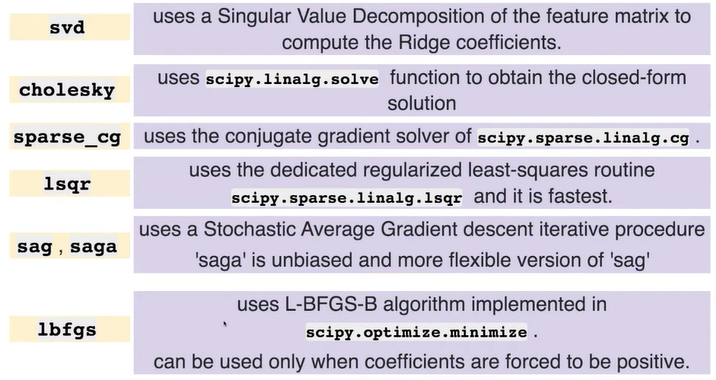

#### Uses of solver in RidgeClassifier

* For large scale data, use `sparse_cg` solver.
* When both `n_samples` and `n_features` are large use `sag` or `saga` solvers.
  * Note that fast convergence is only guaranteed on features with approximately the same scale.

#### How to make RidgeClassifier select the solver automatically?



In [10]:
ridge_classifier = RidgeClassifier(solver="auto")

`auto`: chooses the solver automatically based on the type of data

```
if solver == 'auto':
  if return_intercept:
    # only sag supports fitting intercept directly
    solver = "sag"
  elif not sparse.issparse(X):
    solver = "cholesky"
  else:
    solver = "sparse_cg"
```

default choice for solver is `auto`

#### Is intercept estimation necessary for RidgeClassifier?

If data is already centered, set fit_intercept as false, so that no intercept will be used in calculations.

**Default:**
`ridge_classifier = RidgeClassifier(fit_intercept=True)`

#### How to make predictions on new data samples?

Use `predict` method to predict class labels for samples

* Step 1: Arrange data for prediction in a feature matrix of shape (#samples, #features) or in sparse matrix format.
* Step 2: Call predict method on classifier object with feature matrix as an argument.

In [12]:
ridge_classifier.fit(X_train, y_train)

# predict labels for feature matrix X_test
y_predict = ridge_classifier.predict(X_test)

Other classifiers also use the same predict method.

`RidgeClassifierCV` implements `RidgeClassifer` with built-in cross validation

Let's implement perceptron classifier with Perceptron API

### Perceptron classification

* It is a simple classification algorithm suitable for large-scale learning.
* Shares the same underlying implementation with SGDClassifier

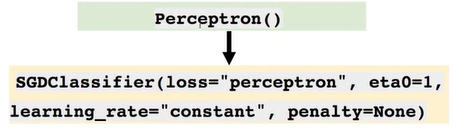

Perceptron uses SGD for training.

#### How to implement perceptron classifier?

* Step 1: Instantiate a Perceptron estimator without passing any arguments to it to create a classifier object.

In [13]:
from sklearn.linear_model import Perceptron
perceptron_classifier = Perceptron()

* Step 2: Call fit method on perceptron estimator object with training feature matrix and label vector as arguments.

In [14]:
# Model training with featrure matrix X_train and lebel vector or matrix y_train
perceptron_classifier.fit(X_train, y_train)

Perceptron()

Perceptron can be further customized with the following parameters:


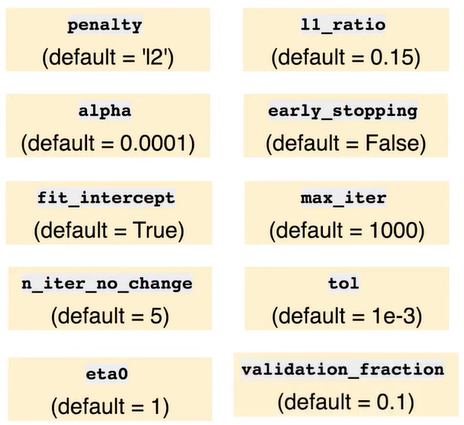

* Perceptron classifier can be trained in an iterative manner with `partial_fit` method
* Perceptron classifier can be initailized to the weights of the previous run by specifying `warm_start=True` in the constructor.

Let's implement logistic regression classifier with LogisticRegression API.

### LogisticRegression API

* Implements logistic regression classifier, which is also known by a few different names like logit regression, maximum entropy classifier (maxent) and log-linear classifier.

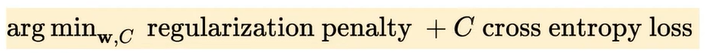

* This implementation can fit
  * binary classification
  * one-vs-rest (OVR)
  * multinomial logistic regression

* Provision for l1, l2 and elastic-net regularization.

#### How to train a LogisticRegression classifier?

* Step 1: Instantiate a classifier estimator without passing any arguments to it. This creates a logistic regression object.

In [15]:
from sklearn.linear_model import LogisticRegression
logit_classifier = LogisticRegression()

* Step 2: Call fit method on logistic regression classifier object with training feature matrix and label vector as arguments.

In [16]:
# Model training with featrure matrix X_train and lebel vector or matrix y_train
logit_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()